In [1]:
import pandas as pd
import requests
import numpy as np
import time
import requests
import bs4
import json
from pymongo.errors import DuplicateKeyError, CollectionInvalid
from pymongo import MongoClient

In [4]:
client = MongoClient()
# Initiate Database
db = client['nyt_articles']
# Initiate Table
tab_sanders = db['table_sanders']
tab_sanders.insert({'bernie': 'cool'})

db = client['nyt_articles']
tab_sanders = db['table_bush']
#tab_sanders.insert({'bush': 'cool'})


In [ ]:
db_comments = client['nyt_comments']

tab_sanders = db_comments['table_sanders']
#db_comments.tab_sanders.insert({'sanders': 'cool'})

db_comments = client['nyt_comments']
tab_bush = db_comments['table_bush']
#db_comments.tab_bush.insert({'bush': 'cool'})

In [4]:
def single_query(link, payload):
    response = requests.get(link, params=payload)
    if response.status_code != 200:
        print 'WARNING', response.status_code
    else:
        return response.json()

In [5]:
from nytimesarticle import articleAPI
api = articleAPI('74c73309c1052e6aa1785df7cd5cef8c:9:69947183')

In [11]:
for i in range(100):
    articles = api.search(q = 'Bernie Sanders', page = i)
    print i
    for y in range(len(articles['response']['docs'])):
        new_data = articles['response']['docs'][y]
        new_data['_id'] = articles['response']['docs'][y]['_id']
        try:
            db.table_sanders.insert(new_data)
        except DuplicateKeyError:
            print 'Peggy doesnt know why its a duplicate.'

0
1
2
3
Peggy doesnt know why its a duplicate.
4
5
Peggy doesnt know why its a duplicate.
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
Peggy doesnt know why its a duplicate.
29
30
31
32
33
34
35
36
37
38
Peggy doesnt know why its a duplicate.
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
Peggy doesnt know why its a duplicate.
88
89
90
91
92
93
94
95
96
97
98
99


In [44]:
for i in range(100):
    articles = api.search(q = 'Jeb Bush', page = i)
    print i
    for y in range(len(articles['response']['docs'])):
        new_data = articles['response']['docs'][y]
        new_data['_id'] = articles['response']['docs'][y]['_id']
        try:
            db.table_bush.insert(new_data)
        except DuplicateKeyError:
            print 'Peggy doesnt know why its a duplicate.'

0
1
2
3
4
Peggy doesnt know why its a duplicate.
5
6
7
8
9
10
Peggy doesnt know why its a duplicate.
11
12
13
14
15
Peggy doesnt know why its a duplicate.
16
17
18
19
20
21
22
Peggy doesnt know why its a duplicate.
23
Peggy doesnt know why its a duplicate.
24
25
26
27
Peggy doesnt know why its a duplicate.
28
29
30
31
32
33
34
35
36
37
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
38
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
39
40
41
42
Peggy doesnt know why its a duplicate.
Peggy doesnt know why its a duplicate.
43
44
45
46
47
48
Peggy doesnt know why its a duplicate.
49
50
51
52
Peggy doesnt know why its a duplicate.
53
54
55
56
Peggy doesnt know why its a duplicate.
57
Peggy doesnt know why its a duplicate.
58
59
60
61
62
Pe

In [12]:
links = db.table_sanders.find({},{'web_url': 1, '_id' : 0})
links_s = []
for i in links:
    links_s.append(str(i['web_url']))

In [38]:
links = db.table_bush.find({},{'web_url': 1, '_id' : 0})
links_b = []

for i in links:
    print i
    if any(i) ==  False:
        pass
    else:
        print str(i['web_url'])
        links_b.append(str(i['web_url'])) 

{u'web_url': u'http://www.nytimes.com/2015/09/19/opinion/gail-collins-the-fight-for-unplanned-parenthood.html'}
http://www.nytimes.com/2015/09/19/opinion/gail-collins-the-fight-for-unplanned-parenthood.html
{u'web_url': u'http://topics.nytimes.com/top/reference/timestopics/people/b/jeb_bush/index.html'}
http://topics.nytimes.com/top/reference/timestopics/people/b/jeb_bush/index.html
{u'web_url': u'http://www.nytimes.com/politics/first-draft/2015/08/20/verbatim-for-george-bush-its-5-oclock-somewhere/'}
http://www.nytimes.com/politics/first-draft/2015/08/20/verbatim-for-george-bush-its-5-oclock-somewhere/
{}
{u'web_url': u'http://www.nytimes.com/2015/09/17/opinion/an-overdose-of-donald-trump-republican-gop-debate.html'}
http://www.nytimes.com/2015/09/17/opinion/an-overdose-of-donald-trump-republican-gop-debate.html
{u'web_url': u'http://www.nytimes.com/2015/09/15/business/dealbook/jeb-bushs-tax-plan-is-brimming-with-surprises.html'}
http://www.nytimes.com/2015/09/15/business/dealbook/jeb

'http://www.nytimes.com/2015/09/19/opinion/gail-collins-the-fight-for-unplanned-parenthood.html'

In [ ]:
for url in links_b:
    for i in range(90):
        print url, i
        link = "http://api.nytimes.com/svc/community/v3/user-content/url.json?url=" + url
        payload = {'api-key': '60a3f7d54baade3ed03a40bdb5f5e866:3:50984754', 'offset' : i}
        content = single_query(link, payload)
        print content
        if content == None:
            pass
        total = content['results']['totalCommentsFound'] 
        #print total
        if total == 0:
            pass
        count = ((total/25) + 2)*25
        num_pages = list(np.arange(0, count, 25))  
        
        for y in range(len(content['results']['comments'])): 
            new_data = content['results']['comments'][y]
            new_data['web_url'] = url
            db_comments.tab_bush.insert(new_data)


http://www.nytimes.com/2015/09/19/opinion/gail-collins-the-fight-for-unplanned-parenthood.html 0
{u'debug': {u'version': 3.1}, u'status': u'OK', u'results': {u'totalParentCommentsFound': 437, u'sort': u'newest', u'totalCommentsFound': 727, u'depthLimit': 0, u'callerID': None, u'totalRecommendationsReturned': 22, u'comments': [{u'recommendedFlag': None, u'parentID': None, u'replies': [], u'commentID': 16134275, u'trusted': 0, u'userDisplayName': u'mick', u'createDate': u'1442676819', u'userID': 55149758, u'replyCount': 0, u'commentTitle': u'n/a', u'status': u'approved', u'sharing': 0, u'approveDate': u'1442728804', u'userTitle': u'NULL', u'recommendations': 14, u'permID': u'16134275', u'picURL': u'http://graphics8.nytimes.com/images/apps/timespeople/none.png', u'editorsSelection': False, u'parentUserDisplayName': None, u'timespeople': 1, u'userURL': u'NULL', u'userLocation': u'Los AngelesIt seems to me the black lives matter movement really care about', u'depth': 1, u'commentType': u'co

In [55]:
from alchemyapi import AlchemyAPI
alchemyapi = AlchemyAPI()

In [30]:
sentiment_s = []
score_list_s = []

text = db_comments.tab_sanders.find({},{'commentBody': 1, '_id' : 0}).limit(1000)
count = db_comments.tab_sanders.find({}).count()
for i in range(1000):
    myText = text[i]['commentBody']
    response = alchemyapi.sentiment("text", myText)
    sentiment_s.append(response["docSentiment"]["type"])
    if response["docSentiment"]["type"] == 'neutral':
        score_val = 0
    else:
        score_val = response["docSentiment"]["score"]
    
    score_list_s.append(score_val)


In [33]:
from itertools import *
sent = pd.DataFrame(sentiment_s)
sent.columns = ['Sentiment']
sent['Sentiment'].value_counts()
sanders = pd.DataFrame(list(izip_longest(sentiment_s, score_list_s)))

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

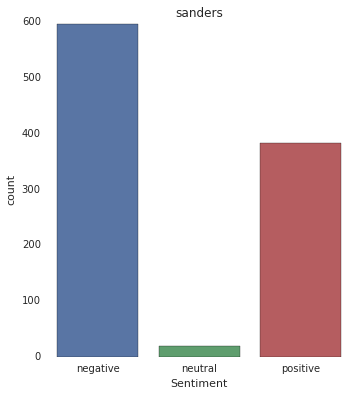

In [36]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sanders.columns = ['Sentiment', 'Score']
sanders['Score'] = sanders['Score'].astype(float)
sanders.sort('Sentiment', inplace=True)
ax = sns.countplot(x="Sentiment", data=sanders)
plt.title('sanders')

(-1.5, 1.5)

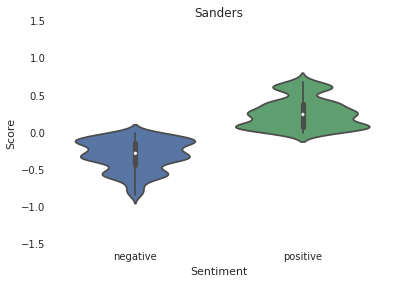

In [42]:
plt.figure(figsize=(6,4))
sanders1 = sanders[~(sanders == 0).any(axis=1)]
sns.violinplot(x="Sentiment", y='Score', data=sanders1)
plt.title('Sanders')
plt.ylim(-1.5,1.5)